## Combined all the data into a big df/csv

In [3]:
import pandas as pd
from datetime import datetime

In [4]:
df_price_000969_SZ = pd.read_csv("Datasets/Advanced Technology _ Materials Co., Ltd. (000969.SZ) Stock Prices.csv")
df_price_ASM_AX = pd.read_csv("Datasets/ASM.AX.csv")
df_price_000970_SZ = pd.read_csv("Datasets/Beijing Zhong Ke San Huan High-Tech Co., Ltd. (000970.SZ) Stock Prices.csv")
df_price_300127_SZ = pd.read_csv("Datasets/Chengdu Galaxy Magnets Co.,Ltd. (300127.SZ) Stock Prices.csv")
df_price_000795_SZ = pd.read_csv("Datasets/Innuovo Technology Co., Ltd. (000795.SZ) Stock Prices.csv")
df_interpolated_ev_sales = pd.read_csv("Datasets/Interpolated EV Sales.csv", parse_dates=['Date'], date_parser=lambda x: datetime.strptime(x, '%d/%m/%Y'))
df_interpolated_wind_energy = pd.read_csv("Datasets/Interpolated Wind Energy.csv")
df_price_LYC_AX = pd.read_csv("Datasets/LYC.AX.csv")
df_price_MP = pd.read_csv("Datasets/MP.csv")
df_price_NEO_TO = pd.read_csv("Datasets/NEO.TO.csv")
df_price_neodymium = pd.read_excel("Datasets/Neodymium Prices.xlsx")
df_price_600366_SS = pd.read_csv("Datasets/Ningbo Yunsheng Co., Ltd. (600366.SS) Stock Prices.csv")
df_price_600259_SS = pd.read_csv("Datasets/Rising Nonferrous Metals Share Co.,Ltd. (600259.SS) Stock Prices.csv")
df_price_002057_SZ = pd.read_csv("Datasets/Sinosteel New Materials Co., Ltd. (002057.SZ) Stock Prices.csv")
df_price_UUUU = pd.read_csv("Datasets/UUUU.csv")
df_price_300224_SZ = pd.read_csv("Datasets/Yantai Zhenghai Magnetic Material Co., Ltd. (300224.SZ) Stock Prices.csv")
df_price_002249_SZ = pd.read_csv("Datasets/Zhongshan Broad-Ocean Motor Co., Ltd. (002249.SZ) Stock Prices.csv")


In [5]:
all_df_price_names = [df_price_000969_SZ, df_price_ASM_AX, df_price_000970_SZ, df_price_300127_SZ, df_price_000795_SZ, df_price_LYC_AX, df_price_MP, df_price_NEO_TO, df_price_600366_SS, df_price_600259_SS, df_price_002057_SZ, df_price_UUUU, df_price_300224_SZ, df_price_002249_SZ]
all_price_names = ["000969_SZ", "ASM_AX", "000970_SZ", "300127_SZ", "000795_SZ", "LYC_AX", "MP", "NEO_TO", "600366_SS", "600259_SS", "002057_SZ", "UUUU", "300224_SZ", "002249_SZ"]
all_df_other_names = [df_interpolated_ev_sales, df_interpolated_wind_energy]
all_other_names = ["ev_sales", "wind_energy"]

In [6]:

for name in all_df_price_names: 
    name["Date"] = pd.to_datetime(name["Date"])
for name in all_df_other_names:
    name["Date"] = pd.to_datetime(name["Date"])

df_price_neodymium["Date"] = pd.to_datetime(df_price_neodymium["Date"])

C:\Users\brian\AppData\Local\Temp\ipykernel_10288\2172093778.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  name["Date"] = pd.to_datetime(name["Date"])
C:\Users\brian\AppData\Local\Temp\ipykernel_10288\2172093778.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  name["Date"] = pd.to_datetime(name["Date"])


In [7]:
df = pd.DataFrame()
for i in range(len(all_df_price_names)): 
    relevant_df = all_df_price_names[i][["Date", "Adj Close", "Volume"]]
    relevant_df = relevant_df.rename(columns = {"Adj Close" : f"Adj Close {all_price_names[i]}", "Volume" : f"Volume {all_price_names[i]}"})
    # print(relevant_df)
    relevant_df = relevant_df.set_index("Date")
    df = df.join(relevant_df, how = "outer")

for i in range(len(all_df_other_names)):
    try :
        relevant_df = all_df_other_names[i][["Date", "Interpolated Demand", "Interpolated Value"]]
        relevant_df = relevant_df.rename(columns = {"Interpolated Demand": f"Interpolated Demand {all_other_names[i]}", "Interpolated Value" : f"Interpolated Value {all_other_names[i]}"})
        relevant_df = relevant_df.set_index("Date")
        df = df.join(relevant_df, how = "outer")
    except:
        relevant_df = all_df_other_names[i][["Date", "Interpolated Value"]]
        relevant_df = relevant_df.rename(columns = {"Interpolated Value" : f"Interpolated Value {all_other_names[i]}"})
        relevant_df = relevant_df.set_index("Date")
        df = df.join(relevant_df, how = "outer")

In [8]:
df

,Adj Close 000969_SZ,Volume 000969_SZ,Adj Close ASM_AX,Volume ASM_AX,Adj Close 000970_SZ,Volume 000970_SZ,Adj Close 300127_SZ,Volume 300127_SZ,Adj Close 000795_SZ,Volume 000795_SZ,...,Volume 002057_SZ,Adj Close UUUU,Volume UUUU,Adj Close 300224_SZ,Volume 300224_SZ,Adj Close 002249_SZ,Volume 002249_SZ,Interpolated Demand ev_sales,Interpolated Value ev_sales,Interpolated Value wind_energy
Date,,,,,,,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_price_neodymium = df_price_neodymium.set_index("Date")
df = df.join(df_price_neodymium, how = "left")

In [10]:
df["Price (CNY/T)"] = df["Price (CNY/T)"].shift(periods = 30) ## Adding response variable to the df, shift 30 days look ahead period 

## Extract data from jan 2021 to oct 2022 and preprocess it further 

In [11]:
df = df[df.index > "2021-01-01"] # Look at data after 4 jan 2020 
df = df[df.index < "2022-12-31"]
df = df.fillna(method = "ffill")
df = df.tail(-2)

In [12]:
df

,Adj Close 000969_SZ,Volume 000969_SZ,Adj Close ASM_AX,Volume ASM_AX,Adj Close 000970_SZ,Volume 000970_SZ,Adj Close 300127_SZ,Volume 300127_SZ,Adj Close 000795_SZ,Volume 000795_SZ,...,Adj Close UUUU,Volume UUUU,Adj Close 300224_SZ,Volume 300224_SZ,Adj Close 002249_SZ,Volume 002249_SZ,Interpolated Demand ev_sales,Interpolated Value ev_sales,Interpolated Value wind_energy,Price (CNY/T)
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,6.713665,14145487.0,4.780,439213.0,9.721244,25615730.0,16.844931,5962203.0,5.59,17232127.0,...,3.94,6334200.0,12.287955,20536658.0,4.373618,96506968.0,23570.37653,9.944049e+08,2812.868336,635000.0
2021-01-05,6.753568,13718457.0,4.780,439213.0,9.750911,16332830.0,17.007177,6788244.0,5.57,12893976.0,...,4.37,6103100.0,13.202180,41497311.0,4.316941,78225479.0,23486.75732,9.910441e+08,2809.391347,635000.0
2021-01-06,6.613908,11556685.0,5.020,544232.0,9.701465,13923363.0,16.510895,5067661.0,5.43,14612100.0,...,4.16,5397400.0,12.808965,21643522.0,4.175247,60969682.0,23403.13810,9.876834e+08,2805.914358,635000.0
2021-01-07,6.514151,13426712.0,7.290,599618.0,9.661907,18112475.0,16.215036,5105801.0,5.36,15409792.0,...,4.20,3149100.0,12.533715,20727502.0,4.118569,57241206.0,23319.51888,9.843226e+08,2802.437369,625000.0
2021-01-08,6.753568,20120275.0,7.290,599618.0,9.711353,18551280.0,15.785563,5342705.0,5.23,18467772.0,...,4.01,4795200.0,11.747286,21529118.0,4.203585,68194148.0,23235.89966,9.809619e+08,2798.960380,625000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,8.070000,20053827.0,1.420,302009.0,12.590000,19124868.0,15.190000,1965480.0,6.50,9191346.0,...,6.17,1315100.0,12.610000,6195044.0,5.150000,11835392.0,61323.90742,2.521404e+09,2976.092394,905000.0
2022-12-27,8.140000,33289617.0,1.420,302009.0,13.850000,90710906.0,15.970000,6278960.0,6.68,17859983.0,...,6.26,1320700.0,12.950000,14857850.0,5.190000,10419563.0,61323.90742,2.521404e+09,2976.092394,905000.0
2022-12-28,7.930000,21105880.0,1.370,275839.0,13.950000,95619502.0,15.690000,2549844.0,6.72,19388733.0,...,6.02,1858100.0,12.830000,8813188.0,5.140000,7233929.0,61323.90742,2.521404e+09,2976.092394,905000.0


In [13]:
df.isnull().values.any()

False

In [14]:
df.to_csv("combined_raw_variables.csv")

In [15]:
df.corr(numeric_only=True)

,Adj Close 000969_SZ,Volume 000969_SZ,Adj Close ASM_AX,Volume ASM_AX,Adj Close 000970_SZ,Volume 000970_SZ,Adj Close 300127_SZ,Volume 300127_SZ,Adj Close 000795_SZ,Volume 000795_SZ,...,Adj Close UUUU,Volume UUUU,Adj Close 300224_SZ,Volume 300224_SZ,Adj Close 002249_SZ,Volume 002249_SZ,Interpolated Demand ev_sales,Interpolated Value ev_sales,Interpolated Value wind_energy,Price (CNY/T)
Adj Close 000969_SZ,1.000000,0.584985,0.299943,0.159185,0.524812,0.412165,0.845297,0.525671,0.556578,0.533202,...,0.201504,-0.173225,0.685769,0.512369,0.891496,0.394839,0.221971,0.178363,0.004102,0.087096
Volume 000969_SZ,0.584985,1.000000,0.271393,0.089145,0.053123,0.271660,0.454712,0.622784,0.106349,0.316803,...,-0.067605,-0.113153,0.336122,0.505258,0.336819,0.434033,-0.062139,-0.059890,-0.245325,-0.299703
Adj Close ASM_AX,0.299943,0.271393,1.000000,-0.002168,-0.225328,0.049991,0.474047,0.386563,-0.112404,0.190282,...,0.168106,0.121493,0.097075,0.273275,0.391692,0.431387,-0.375394,-0.390170,0.115762,-0.190172
Volume ASM_AX,0.159185,0.089145,-0.002168,1.000000,0.111818,0.066441,0.105753,0.133315,0.092096,0.075459,...,-0.043084,0.015981,0.089658,0.057336,0.146223,0.083340,0.162228,0.154110,-0.047195,-0.001795
Adj Close 000970_SZ,0.524812,0.053123,-0.225328,0.111818,1.000000,0.487075,0.362288,0.060369,0.773927,0.374718,...,0.147263,-0.264895,0.697393,0.282133,0.467499,-0.147528,0.544062,0.489972,0.036052,0.486904
Volume 000970_SZ,0.412165,0.271660,0.049991,0.066441,0.487075,1.000000,0.353236,0.443396,0.295020,0.302421,...,-0.114126,-0.039938,0.459134,0.438454,0.319495,0.212657,0.052993,0.022253,-0.116116,0.028614
Adj Close 300127_SZ,0.845297,0.454712,0.474047,0.105753,0.362288,0.353236,1.000000,0.654341,0.570928,0.656582,...,0.320825,-0.038172,0.777230,0.677845,0.876397,0.401357,0.024665,-0.019980,0.324835,0.164458
Volume 300127_SZ,0.525671,0.622784,0.386563,0.133315,0.060369,0.443396,0.654341,1.000000,0.153152,0.464967,...,-0.077618,-0.058159,0.489457,0.767301,0.406206,0.509028,-0.156399,-0.168393,-0.127088,-0.244791
Adj Close 000795_SZ,0.556578,0.106349,-0.112404,0.092096,0.773927,0.295020,0.570928,0.153152,1.000000,0.704672,...,0.296568,-0.193017,0.855825,0.492707,0.547381,-0.154362,0.522618,0.479940,0.357717,0.643820
Volume 000795_SZ,0.533202,0.316803,0.190282,0.075459,0.374718,0.302421,0.656582,0.464967,0.704672,1.000000,...,0.123826,-0.078472,0.747507,0.708730,0.509107,0.178141,0.074339,0.042158,0.241864,0.265366


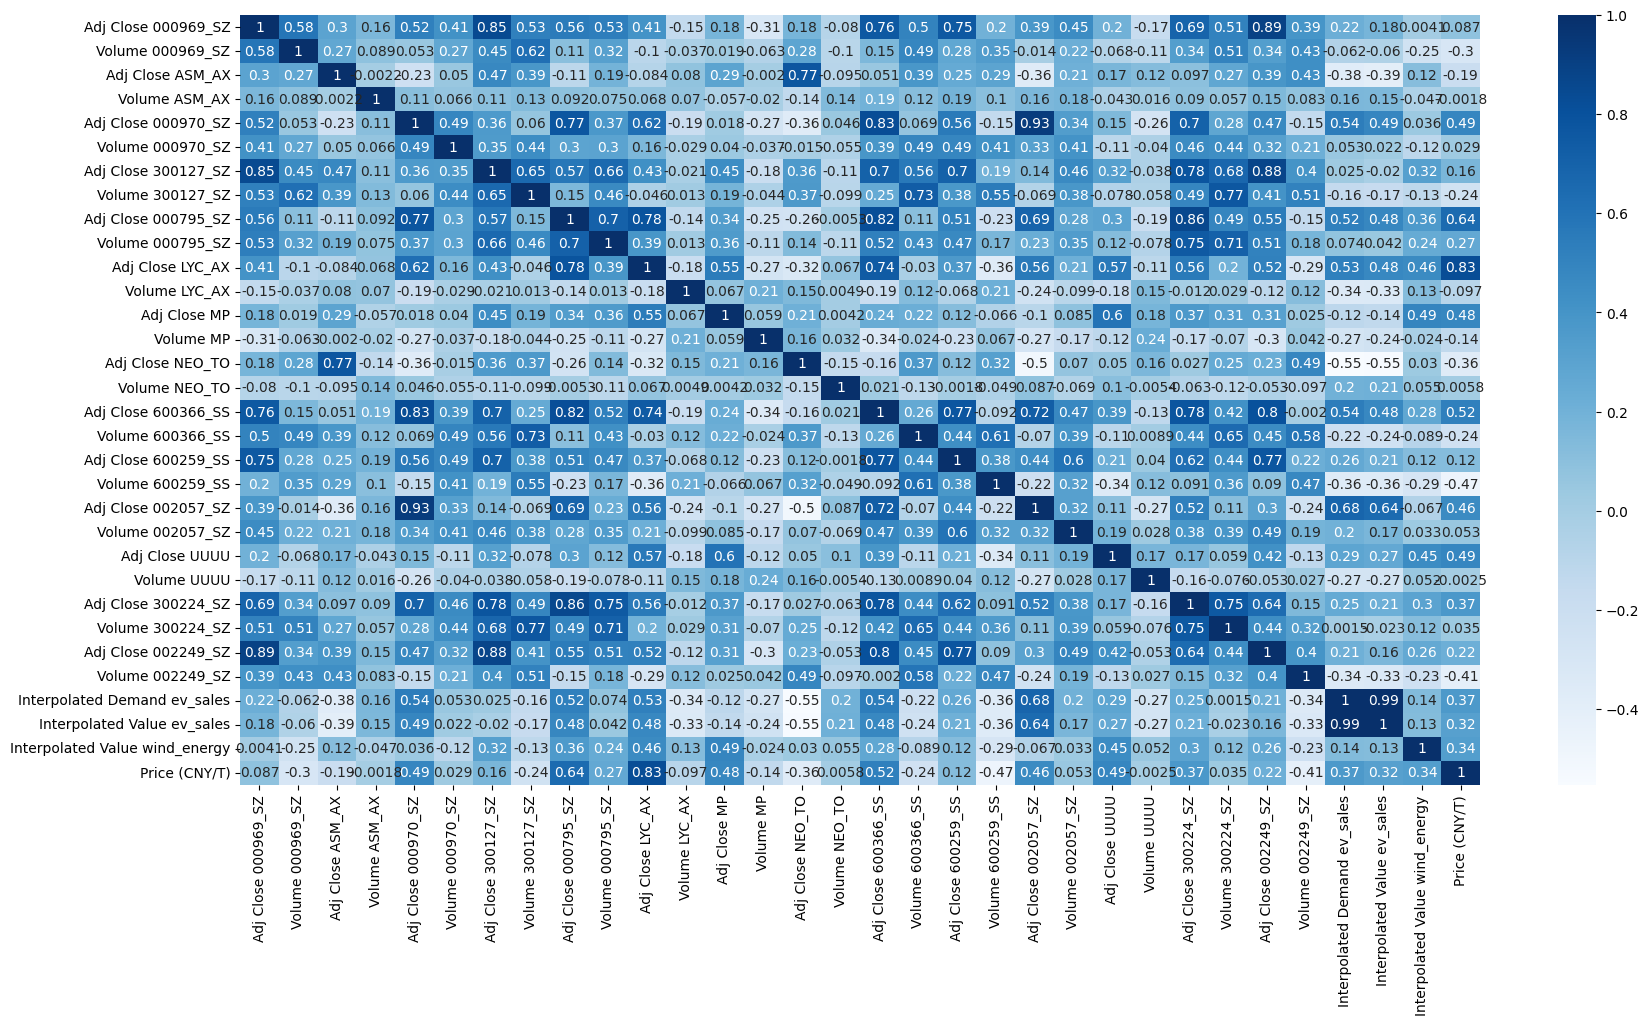

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
ax =  sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

In [17]:
df.corr(method="spearman")

,Adj Close 000969_SZ,Volume 000969_SZ,Adj Close ASM_AX,Volume ASM_AX,Adj Close 000970_SZ,Volume 000970_SZ,Adj Close 300127_SZ,Volume 300127_SZ,Adj Close 000795_SZ,Volume 000795_SZ,...,Adj Close UUUU,Volume UUUU,Adj Close 300224_SZ,Volume 300224_SZ,Adj Close 002249_SZ,Volume 002249_SZ,Interpolated Demand ev_sales,Interpolated Value ev_sales,Interpolated Value wind_energy,Price (CNY/T)
Adj Close 000969_SZ,1.000000,0.564037,0.247756,0.117016,0.597771,0.544448,0.851884,0.480231,0.513496,0.532251,...,0.214308,-0.241072,0.662351,0.462153,0.890060,0.306180,0.270870,0.210895,0.008338,0.143586
Volume 000969_SZ,0.564037,1.000000,0.253029,-0.027047,0.017251,0.385581,0.370423,0.590671,-0.037057,0.259401,...,-0.129492,-0.122553,0.196502,0.387640,0.304590,0.632741,-0.190689,-0.184487,-0.365694,-0.361846
Adj Close ASM_AX,0.247756,0.253029,1.000000,0.005881,-0.233949,0.032458,0.408726,0.423857,-0.182868,0.185445,...,0.124610,0.188184,-0.001696,0.233139,0.313089,0.449175,-0.372997,-0.395017,0.106309,-0.245593
Volume ASM_AX,0.117016,-0.027047,0.005881,1.000000,0.193424,0.213464,0.136245,0.118826,0.137847,0.146962,...,0.020516,0.047365,0.151616,0.113118,0.133469,-0.091268,0.188517,0.164429,0.013707,0.042453
Adj Close 000970_SZ,0.597771,0.017251,-0.233949,0.193424,1.000000,0.570790,0.492048,0.047474,0.874989,0.498223,...,0.273627,-0.333598,0.781287,0.324899,0.596026,-0.274281,0.717000,0.667635,0.235774,0.574199
Volume 000970_SZ,0.544448,0.385581,0.032458,0.213464,0.570790,1.000000,0.518908,0.551149,0.433132,0.623922,...,-0.073439,-0.186513,0.615415,0.634374,0.441737,0.190546,0.225940,0.188445,-0.051984,0.057108
Adj Close 300127_SZ,0.851884,0.370423,0.408726,0.136245,0.492048,0.518908,1.000000,0.604632,0.521383,0.669655,...,0.311743,-0.024402,0.715465,0.590938,0.885655,0.303876,0.131783,0.070509,0.266855,0.228331
Volume 300127_SZ,0.480231,0.590671,0.423857,0.118826,0.047474,0.551149,0.604632,1.000000,0.130952,0.675487,...,-0.148251,0.073724,0.416446,0.790380,0.371889,0.589271,-0.225065,-0.230568,-0.137323,-0.216258
Adj Close 000795_SZ,0.513496,-0.037057,-0.182868,0.137847,0.874989,0.433132,0.521383,0.130952,1.000000,0.679458,...,0.322059,-0.231377,0.849589,0.444308,0.544631,-0.279544,0.654697,0.624166,0.361244,0.743925
Volume 000795_SZ,0.532251,0.259401,0.185445,0.146962,0.498223,0.623922,0.669655,0.675487,0.679458,1.000000,...,0.067886,-0.042405,0.764985,0.825285,0.535553,0.164927,0.174735,0.139462,0.198976,0.370300


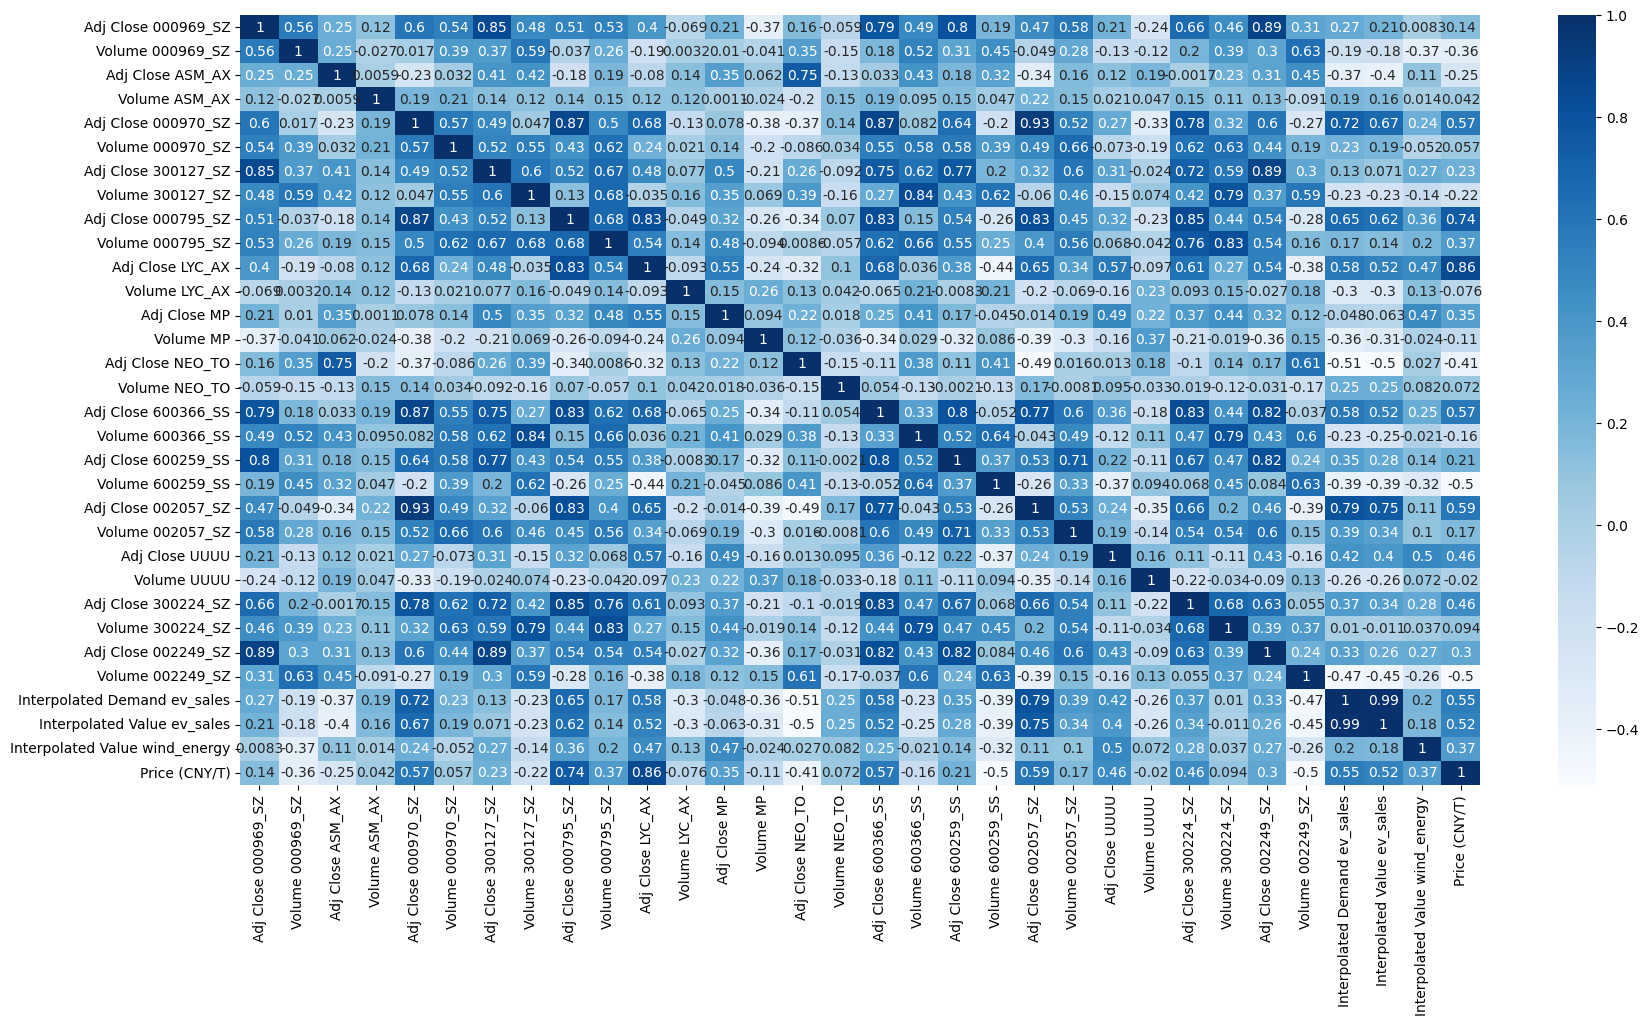

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
ax =  sns.heatmap(df.corr(numeric_only=True, method="spearman"), annot=True, cmap='Blues')

In [19]:
price_corr = df.corr(method="spearman")["Price (CNY/T)"]
price_corr[price_corr > 0.5]

Adj Close 000970_SZ             0.574199
Adj Close 000795_SZ             0.743925
Adj Close LYC_AX                0.858415
Adj Close 600366_SS             0.570088
Adj Close 002057_SZ             0.590438
Interpolated Demand ev_sales    0.554029
Interpolated Value ev_sales     0.522251
Price (CNY/T)                   1.000000
Name: Price (CNY/T), dtype: float64

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [21]:
df_columns_list = df.columns.tolist()
predicted = df_columns_list[-1]
variables = df_columns_list[0:-1]
variables_string = ""
for var in variables:
    variables_string = variables_string + (var + ",")
# variables_string = variables_string[0:-1] ## Remove the last comma
variables_string = variables_string[0:19] 
linear_regression_formula = f"{variables_string} ~ {predicted}"
variables_string

'Adj Close 000969_SZ'

In [22]:
model = sm.OLS(df["Price (CNY/T)"], df.loc[:, df.columns != "Price (CNY/T)"]).fit()

In [23]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:          Price (CNY/T)   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              2258.
Date:                Sat, 18 Feb 2023   Prob (F-statistic):                        0.00
Time:                        22:28:55   Log-Likelihood:                         -9269.7
No. Observations:                 720   AIC:                                  1.860e+04
Df Residuals:                     689   BIC:                                  1.874e+04
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [24]:
import tensorflow as tf
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import math
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense

In [25]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

In [26]:
regressors = ["Adj Close 000970_SZ", "Adj Close 000795_SZ", "Adj Close LYC_AX", "Adj Close 600366_SS", "Adj Close 002057_SZ", "Interpolated Demand ev_sales", "Interpolated Value ev_sales"]
x = df[regressors]
x = sc.fit_transform(x.to_numpy())
x = pd.DataFrame(x, columns=regressors)
y = df["Price (CNY/T)"]
y = sc.fit_transform(np.array(y).reshape(len(df), 1))

In [27]:
x_train = np.array(x[:500])
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.array(x[500:])
y_train = np.array(y[:500]).reshape(500,1)
y_test = np.array(y[500:]).reshape(len(y)-500,1)

In [28]:
batch_size = 256
buffer_size = x_train.shape[0]
train_iterator = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(buffer_size).batch(batch_size).repeat()

In [29]:
x_train.shape

(500, 7, 1)

In [30]:
n_steps = x_train.shape[-2]
n_features = x_train.shape[-1]
# Define the model
model = Sequential()
model.add(Bidirectional(LSTM(64, activation='relu', input_shape=(n_steps, n_features))))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [31]:
epochs = 10
steps_per_epoch = 50
history = model.fit(train_iterator, epochs=epochs,
                    steps_per_epoch=steps_per_epoch)
print('=======================')
model.summary()

Epoch 1/10
50/50 [==============================] - 4s 10ms/step - loss: 0.0837
Epoch 2/10
50/50 [==============================] - 0s 9ms/step - loss: 0.0469
Epoch 3/10
50/50 [==============================] - 0s 9ms/step - loss: 0.0445
Epoch 4/10
50/50 [==============================] - 0s 9ms/step - loss: 0.0431
Epoch 5/10
50/50 [==============================] - 0s 10ms/step - loss: 0.0388
Epoch 6/10
50/50 [==============================] - 0s 9ms/step - loss: 0.0273
Epoch 7/10
50/50 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 8/10
50/50 [==============================] - 1s 10ms/step - loss: 0.0079
Epoch 9/10
50/50 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 10/10
50/50 [==============================] - 0s 10ms/step - loss: 0.0072
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)          

In [32]:
predicted_price = model.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price)

7/7 [==============================] - 0s 3ms/step
[[1370779.8 ]
 [1398969.4 ]
 [1400396.4 ]
 [1401824.  ]
 [1379696.9 ]
 [1419334.5 ]
 [1344788.6 ]
 [1363372.1 ]
 [1362144.  ]
 [1363753.8 ]
 [1365364.6 ]
 [1476240.  ]
 [1470379.9 ]
 [1301513.9 ]
 [1268716.4 ]
 [1344207.5 ]
 [1343413.8 ]
 [1342620.1 ]
 [1244965.2 ]
 [1306323.1 ]
 [1322151.1 ]
 [1234647.8 ]
 [1052080.6 ]
 [1051439.4 ]
 [1050799.5 ]
 [1017838.  ]
 [1009638.25]
 [1121534.8 ]
 [1116773.8 ]
 [1003865.1 ]
 [1003443.25]
 [1003020.56]
 [ 952531.06]
 [1071684.  ]
 [1025909.4 ]
 [ 891053.56]
 [ 877398.8 ]
 [ 877019.6 ]
 [ 876640.5 ]
 [ 879431.44]
 [ 847716.8 ]
 [ 845460.1 ]
 [ 847809.3 ]
 [ 844837.5 ]
 [ 844863.25]
 [ 844889.06]
 [ 844216.9 ]
 [ 831915.7 ]
 [ 836902.5 ]
 [ 867868.4 ]
 [ 846841.25]
 [ 846867.5 ]
 [ 846893.6 ]
 [ 845101.9 ]
 [ 761952.06]
 [ 828490.9 ]
 [ 848639.4 ]
 [ 862646.2 ]
 [ 862672.5 ]
 [ 862698.75]
 [ 857664.  ]
 [ 868498.56]
 [ 844159.06]
 [ 851887.3 ]
 [ 854913.1 ]
 [ 854939.  ]
 [ 854964.9 ]
 [ 859201.8

In [33]:
sc.inverse_transform(y_test)

array([[1105000.],
       [1110000.],
       [1095000.],
       [1095000.],
       [1095000.],
       [1095000.],
       [1095000.],
       [1095000.],
       [1095000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1105000.],
       [1135000.],
       [1150000.],
       [1150000.],
       [1150000.],
       [1150000.],
       [1150000.],
       [1160000.],
       [1170000.],
       [1170000.],
       [1170000.],
       [1170000.],
       [1170000.],
       [1170000.],
       [1170000.],
       [1170000.],
       [1170000.],
       [1185000.],
       [1185000.],
       [1185000.],
       [1185000.],
       [1195000.],
       [1195000.],
       [1195000.],
       [1195000.],
       [1195000.],
       [1195000.],
       [1195000.],
       [1195000.],
       [1200000.],
       [1200000.],
       [1200000.],
       [1200